In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from simpleparamaterisation import TPCevt as TPC
from scipy.stats import multivariate_normal

det = TPC.Detector("Simple TPC with Atmospheric Ar (default values)")

Welcome to JupyROOT 6.28/00


In [3]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('open', 152),
 ('TPC', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('det', 56),
 ('multivariate_normal', 56)]

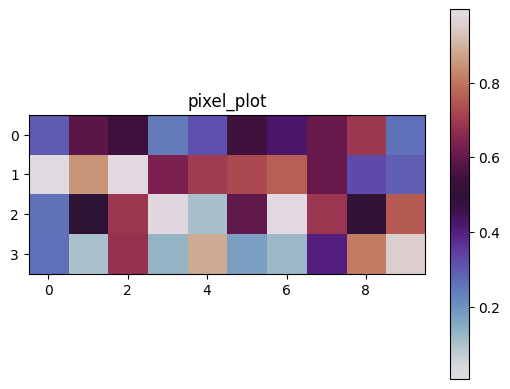

In [4]:
data = np.random.random((4, 10))

# creating a plot
pixel_plot = plt.figure()

# plotting a plot
# pixel_plot.add_axes()

# customizing plot
plt.title("pixel_plot")
pixel_plot = plt.imshow(data, cmap='twilight', interpolation='nearest')

plt.colorbar(pixel_plot)

# show plot
plt.show(pixel_plot)

In [5]:
grid_size = 10
pitch_x = 0.4
pitch_y = 0.4

grid = np.mgrid[-grid_size*pitch_x:(grid_size+1)*pitch_x:pitch_x,
        -grid_size*pitch_y:(grid_size+1)*pitch_y:pitch_y
        ]

print(grid.shape)
print(data.shape)

(2, 21, 21)
(4, 10)


In [6]:
grid_offset = np.array([0.1, 0.3])
grid_spacing = np.array([1., 1.5])

print(grid_offset)
print(grid_spacing)

[0.1 0.3]
[1.  1.5]


In [7]:
point = np.array([1.12121, 3.42])
index = np.round((point - grid_offset) / grid_spacing)
print(index)

[1. 2.]


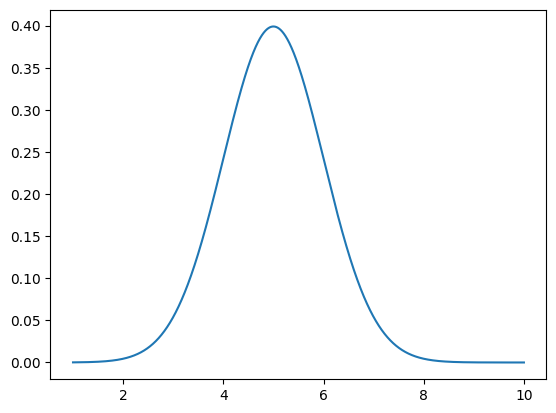

In [8]:
x = np.arange(1,10,0.0001)

y = multivariate_normal(5, 1).pdf(x)

plt.plot(x, y)

(90000,)


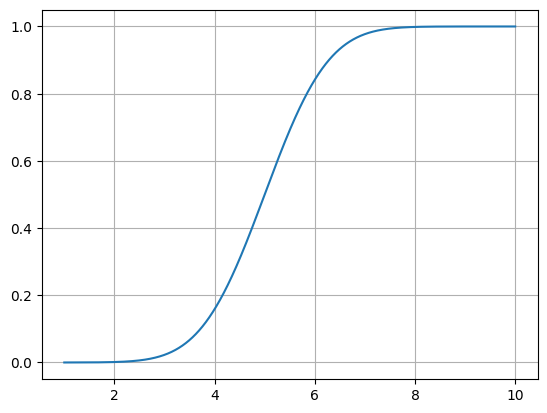

In [9]:
x = np.arange(1,10,0.0001)

y = multivariate_normal(5, 1).cdf(x)
print(y.shape)
plt.plot(x, y)
plt.grid()

(9,)


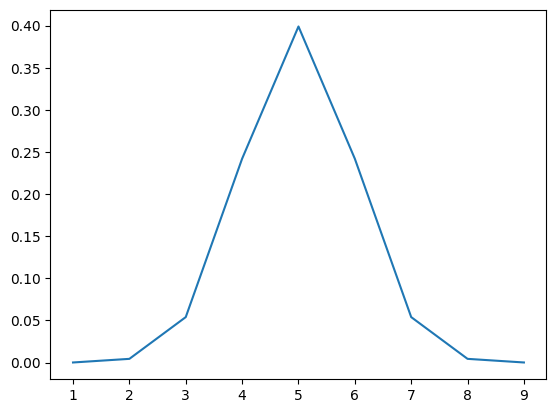

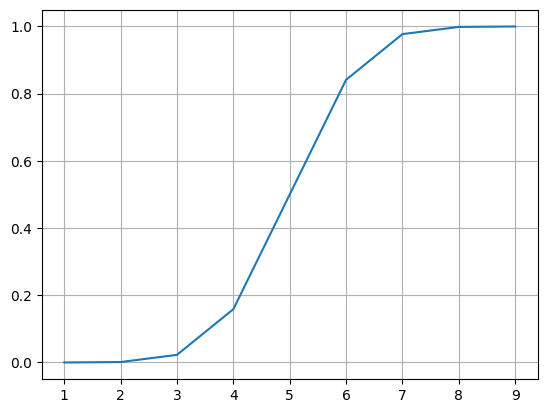

In [10]:
x = np.mgrid[1:10:1]
print(x.shape)

rv = multivariate_normal(5, 1)
y = rv.pdf(x)
sum = rv.cdf(x)

plt.grid()

plt.figure(0)
plt.plot(x, y)

plt.figure(1)
plt.plot(x, sum)

In [11]:
n2 = rv.cdf(4)
n1 = rv.cdf(3)
print(n1, n2, n2-n1)

0.02275013194817923 0.15865525393145702 0.13590512198327778


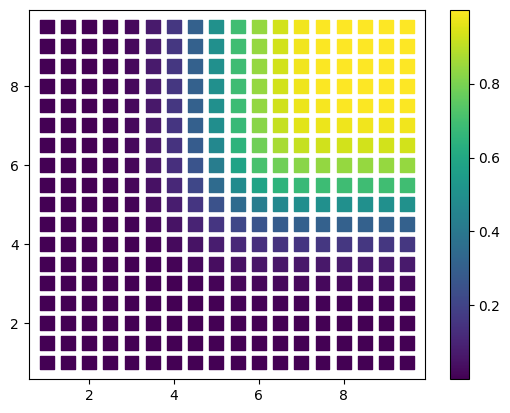

In [12]:
x, y = np.mgrid[1:10:0.5, 1:10:0.5]

pos = np.stack((x, y), axis = -1)

rv = multivariate_normal([5, 5])

val = rv.cdf(pos)
# print(val)

fig = plt.figure()
ax = fig.add_subplot(111)

# Create scatter plot
scatter = ax.scatter(x, y, c=val, s=100, marker='s')

# Add colorbar
cbar = fig.colorbar(scatter)

plt.show()

(18, 18, 3)


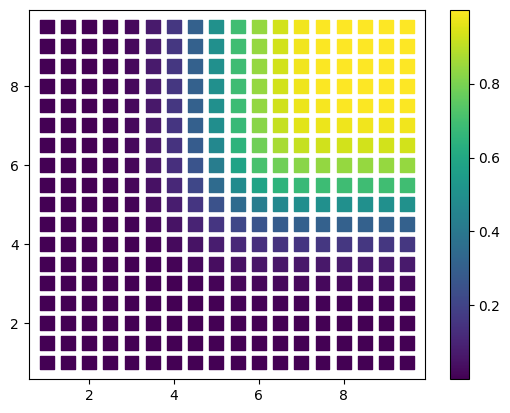

In [13]:
x, y = np.mgrid[1:10:0.5, 1:10:0.5]

pos = np.stack((x-5, y-5), axis = -1)

rv = multivariate_normal([0, 0])
val = rv.cdf(pos)
# print(val)

fig = plt.figure()
ax = fig.add_subplot(111)

# Create scatter plot
scatter = ax.scatter(x, y, c=val, s=100, marker='s')

value = np.stack((x, y, val), axis = -1)
print(value.shape)

# Add colorbar
cbar = fig.colorbar(scatter)

plt.show()

In [14]:
import numpy as np
from scipy.stats import multivariate_normal

# Step 1: Define the desired point for the offset
desired_point = np.array([2, 3])

# Step 2: Define the mean and covariance matrix for the original distribution
mean = np.array([0, 0])
cov_matrix = np.array([[1, 0.5], [0.5, 1]])

# Step 3: Create a random sample from the original distribution
np.random.seed(42)  # For reproducibility
original_sample = multivariate_normal(mean=mean, cov=cov_matrix).rvs(size=1000)

# Step 4: Calculate the offset
offset = desired_point - mean

# Step 5: Add the offset to the random sample to obtain the new distribution
new_sample = original_sample + offset

# Print the mean and covariance of the new sample (should be approximately the desired point and the same covariance as the original)
print("Mean of the new sample:", np.mean(new_sample, axis=0))
print("Covariance of the new sample:")
print(np.cov(new_sample, rowvar=False))


Mean of the new sample: [1.94276888 2.99975103]
Covariance of the new sample:
[[0.95323054 0.43597516]
 [0.43597516 0.94886213]]


In [15]:
minvals = [13.3, 23.3, 33.3]
maxvals = [19.5, 29.5, 39.5]

# DriftedEvt = [[13.4, 23.4, 33.4], [16.4, 26.4, 36.4]]

DriftedEvt = np.array([[1.2, 5.8], [1.2, 2.3]])

grid_size = 20
pitch_x = 0.4
pitch_y = 0.4

rv = multivariate_normal([0,0], np.diag([det.PSFstd, det.PSFstd]))

In [16]:
# print(DriftedEvt[0])
coordinate = DriftedEvt[0]
print(coordinate/0.5)

[ 2.4 11.6]


In [17]:
a = 1.2
delta = 0.5
print(a/delta)

2.4


In [18]:
import math

def coordinate_to_grid_index(a, delta):
    return math.floor((a - delta/2) / delta)

# Given parameters
a = 0.2
delta = 1

# Convert coordinate to grid index
grid_index = coordinate_to_grid_index(a, delta)
print("Coordinate:", a)
print("Grid index:", grid_index)


Coordinate: 0.2
Grid index: -1


In [19]:
import numpy as np

def grid_index_vectorized(a, delta):
    """
    Converts a one-dimensional coordinate to a grid index using NumPy vectorization.

    Args:
    a: The coordinate.
    delta: The grid spacing.

    Returns:
    The grid index.
    """

    index = np.floor((a + delta / 2) / delta)
    if a < 0:
        index -= 1
    return index

In [20]:
def coordinate_to_grid_index(a, delta):
    return int((a + delta / 2) // delta)

# Example usage:
a = -0.55
delta = 1
grid_index = coordinate_to_grid_index(a, delta)
print(f"The grid index for coordinate {a} is {grid_index}.")


The grid index for coordinate -0.55 is -1.


In [21]:
print(1.6+0.8+1.6)

4.0


In [22]:
# given coordinate
coord = 0.8

# convert it to index grid
grid_index = coordinate_to_grid_index(coord, delta)
print("grid index: ", grid_index)
offset = coord-grid_index
print("distance to center of the grid: ", offset)

grid index:  1
distance to center of the grid:  -0.19999999999999996


In [23]:
# Then create the unofsetted local coordinate grid
grid_size = 10
# local_coordinate = np.arange(-10,11,1)
local_coordinate = np.mgrid[-grid_size:grid_size+1:1]
print(local_coordinate)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[5.57300002e-22 6.09575813e-18 2.45285529e-14 3.63096150e-11
 1.97731964e-08 3.96129909e-06 2.91946926e-04 7.91545158e-03
 7.89501583e-02 2.89691553e-01 3.91042694e-01 1.94186055e-01
 3.54745928e-02 2.38408820e-03 5.89430678e-05 5.36103534e-07
 1.79378391e-09 2.20798996e-12 9.99837875e-16 1.66558803e-19
 1.02073056e-23]


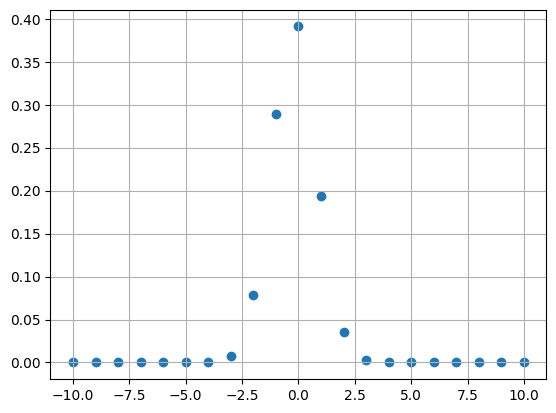

In [24]:
rv = multivariate_normal(0)
# offset = -5

y = rv.pdf(local_coordinate-offset)
print(local_coordinate)
print(y)
plt.scatter(local_coordinate, y)
plt.grid()

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[5.57300002e-22 6.09575813e-18 2.45285529e-14 3.63096150e-11
 1.97731964e-08 3.96129909e-06 2.91946926e-04 7.91545158e-03
 7.89501583e-02 2.89691553e-01 3.91042694e-01 1.94186055e-01
 3.54745928e-02 2.38408820e-03 5.89430678e-05 5.36103534e-07
 1.79378391e-09 2.20798996e-12 9.99837875e-16 1.66558803e-19
 1.02073056e-23]


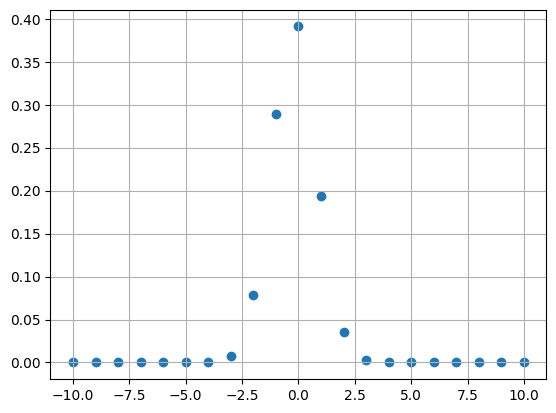

In [25]:
rv = multivariate_normal(offset)
# offset = -5
y = rv.pdf(local_coordinate)
print(local_coordinate)
print(y)
plt.scatter(local_coordinate, y)
plt.grid()

[5.62928229e-23 6.84080764e-19 3.09535874e-15 5.23095755e-12
 3.31574598e-09 7.93328152e-07 7.23480439e-05 2.55513033e-03
 3.59303191e-02 2.11855399e-01 5.79259709e-01 8.84930330e-01
 9.86096552e-01 9.99312862e-01 9.99986654e-01 9.99999900e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


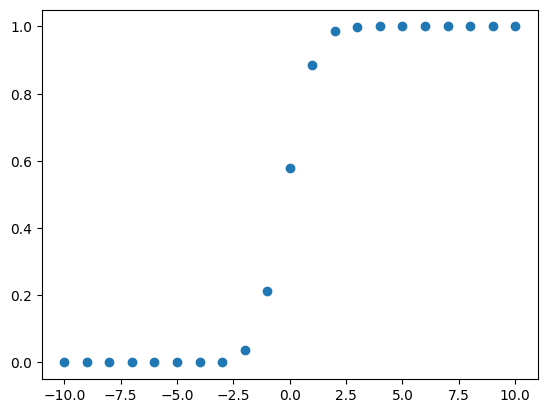

In [26]:
sum = rv.cdf(local_coordinate)
print(sum)
plt.scatter(local_coordinate, sum)

In [27]:
print(local_coordinate-0.5)
print(rv.cdf(local_coordinate-0.5))
print('up to')
print(local_coordinate+0.5)
print(rv.cdf(local_coordinate+0.5))

[-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5]
[3.52306507e-25 7.02228421e-21 5.20556970e-17 1.43883863e-13
 1.48822822e-10 5.79013404e-08 8.53990547e-06 4.83424142e-04
 1.07241100e-02 9.68004846e-02 3.82088578e-01 7.58036348e-01
 9.55434537e-01 9.96533026e-01 9.99892200e-01 9.99998699e-01
 9.99999994e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]
up to
[-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5
  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
[7.02228421e-21 5.20556970e-17 1.43883863e-13 1.48822822e-10
 5.79013404e-08 8.53990547e-06 4.83424142e-04 1.07241100e-02
 9.68004846e-02 3.82088578e-01 7.58036348e-01 9.55434537e-01
 9.96533026e-01 9.99892200e-01 9.99998699e-01 9.99999994e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


In [28]:
rv = multivariate_normal(0)
left = local_coordinate - delta/2
right = local_coordinate + delta/2
print(left)
print(right)
print(right - left)

[-10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5
   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5]
[-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5
  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Test the Cumulative Distribution Function

Text(0.5, 1.0, 'Accumulated')

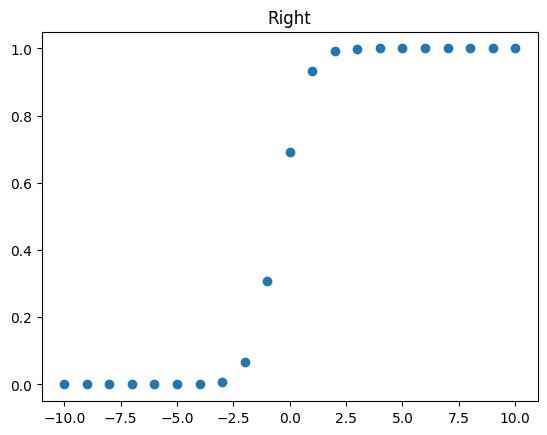

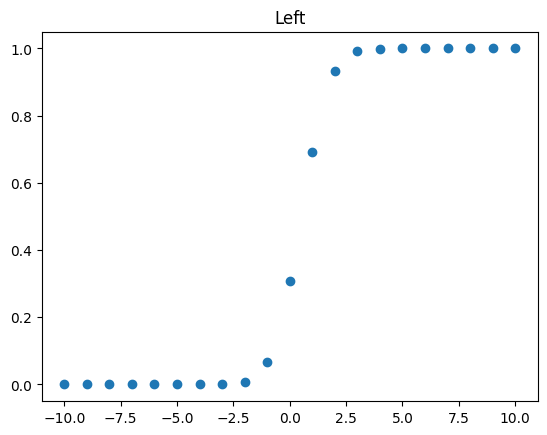

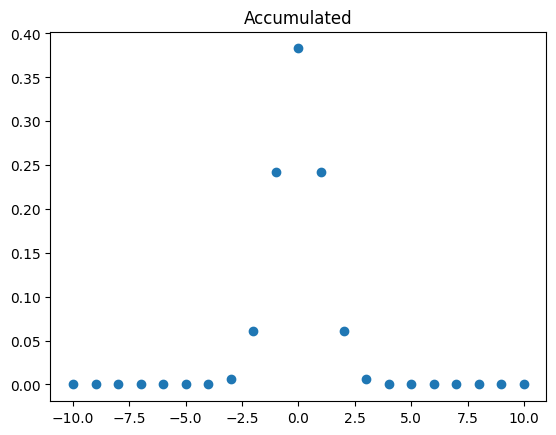

In [32]:
left_value = rv.cdf(local_coordinate-delta/2)
right_value =  rv.cdf(local_coordinate+delta/2)
# print(left_value)
# print(right_value)
accumulated = right_value - left_value
# print(accumulated)

plt.figure(0)
plt.scatter(local_coordinate, right_value)
plt.title('Right')

plt.figure(1)
plt.scatter(local_coordinate, left_value)
plt.title('Left')

plt.figure(2)
plt.scatter(local_coordinate, accumulated)
plt.title('Accumulated')

In [30]:
AccEvt = np.stack((local_coordinate, accumulated), axis=-1)
print(AccEvt)

[[-1.00000000e+01  1.04940831e-21]
 [-9.00000000e+00  9.47848530e-18]
 [-8.00000000e+00  3.18994369e-14]
 [-7.00000000e+00  4.01280970e-11]
 [-6.00000000e+00  1.89494025e-08]
 [-5.00000000e+00  3.37868356e-06]
 [-4.00000000e+00  2.29231406e-04]
 [-3.00000000e+00  5.97703625e-03]
 [-2.00000000e+00  6.05975359e-02]
 [-1.00000000e+00  2.41730337e-01]
 [ 0.00000000e+00  3.82924923e-01]
 [ 1.00000000e+00  2.41730337e-01]
 [ 2.00000000e+00  6.05975359e-02]
 [ 3.00000000e+00  5.97703625e-03]
 [ 4.00000000e+00  2.29231406e-04]
 [ 5.00000000e+00  3.37868356e-06]
 [ 6.00000000e+00  1.89494025e-08]
 [ 7.00000000e+00  4.01281230e-11]
 [ 8.00000000e+00  3.18634008e-14]
 [ 9.00000000e+00  0.00000000e+00]
 [ 1.00000000e+01  0.00000000e+00]]
